In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
from scipy.stats import linregress

In [9]:
file = "output/merged_data.csv"
happy_data = pd.read_csv(file)
happy_data.head()

,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Workforce Gender Ratio
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,88.474361
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,86.841710
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,89.749667
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,89.450885
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,84.757937


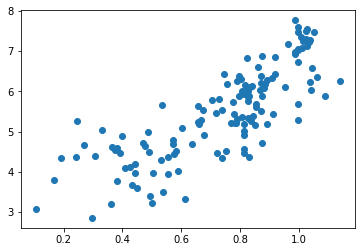

In [14]:
#xval=happy_data['Workforce Gender Ratio']
#xval=happy_data['Freedom to make life choices']
#xval=happy_data['Generosity']
xval=happy_data['Healthy life expectancy']
#val=happy_data['GDP per capita']
#xval=happy_data['Social support']
#xval=happy_data['Perceptions of corruption']
yval=happy_data['Score']
plt.scatter(xval, yval)

In [64]:
r_values = pd.DataFrame(columns=['variable','r'])
variables = ['gdp', 'ss','hlt','free','gen','corrupt','gender']
r_values['variable'] = variables

gdp_r = st.pearsonr(happy_data['GDP per capita'],happy_data['Score'])
ss_r = st.pearsonr(happy_data['Social support'],happy_data['Score'])
hlt_r = st.pearsonr(happy_data['Healthy life expectancy'],happy_data['Score'])
free_r = st.pearsonr(happy_data['Freedom to make life choices'],happy_data['Score'])
gen_r = st.pearsonr(happy_data['Generosity'],happy_data['Score'])
corrupt_r = st.pearsonr(happy_data['Perceptions of corruption'],happy_data['Score'])
gender_r = st.pearsonr(happy_data['Workforce Gender Ratio'],happy_data['Score'])

rVals = [gdp_r[0],ss_r[0],hlt_r[0],free_r[0],gen_r[0],corrupt_r[0],gender_r[0]]
r_values['r']=rVals
r_values

,variable,r
0,gdp,0.809406
1,ss,0.790806
2,hlt,0.804624
3,free,0.557619
4,gen,0.074800
5,corrupt,0.431120
6,gender,0.029835


## TO DO

In [ ]:
#1 7 scatter plots for each var vs happy score
# re-word hypothesis

In [ ]:
# ANOVA test

# GDP = x value
# sort by GDP
# bin GDP into 3 groups: high gdp, med gdp, low gdp

# ANOVA on happy scores within each group
# stats.f_oneway(high, med, low)
# pVal < 0.05?

In [ ]:
# 3 scatter plot corruption vs freedom
# linear regression 



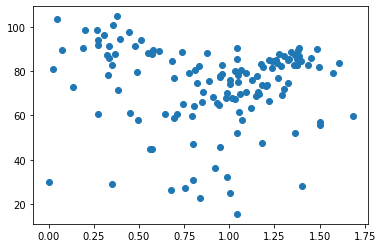

In [20]:
xval=happy_data['GDP per capita']
yval=happy_data['Workforce Gender Ratio']
plt.scatter(xval,yval)

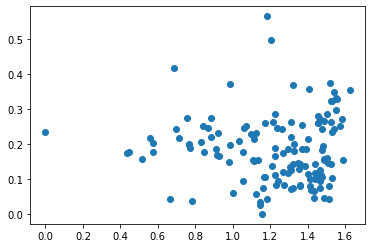

In [18]:
xval=happy_data['Generosity']
yval=happy_data['Social support']
plt.scatter(yval,xval)

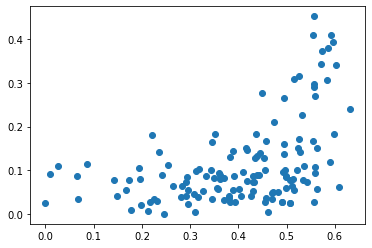

In [21]:
xval=happy_data['Freedom to make life choices']
yval=happy_data['Perceptions of corruption']
plt.scatter(xval,yval)

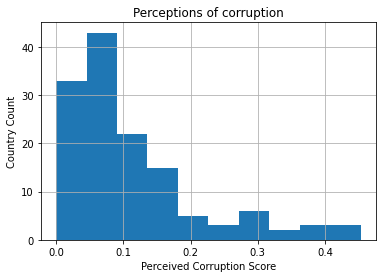

In [30]:
# Perception of corruption: histogram, scatter plot corruption vs freedom

# xval=happy_data['Country']
# yval=happy_data['Perceptions of corruption']
# plt.bar(xval, yval)

happy_data.hist('Perceptions of corruption')
plt.xlabel('Perceived Corruption Score')
plt.ylabel('Country Count')
plt.savefig('output/corrupt_histogram.png')

array([[<AxesSubplot:title={'center':'Freedom to make life choices'}>]],
      dtype=object)

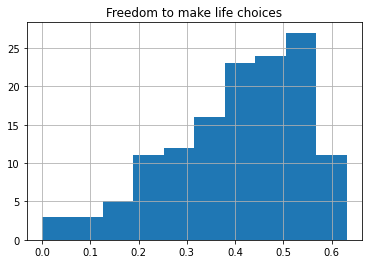

In [25]:
happy_data.hist('Freedom to make life choices')


In [31]:
len(happy_data)

135

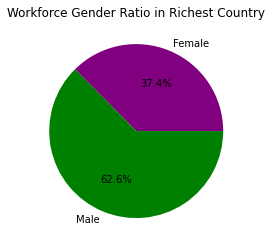

In [50]:
# GDP vs workforce ratio

# richest country
gdp_max = happy_data.loc[happy_data['GDP per capita'] == happy_data['GDP per capita'].max()]
num_female = gdp_max['Workforce Gender Ratio']
num_male = 100

colors=['purple', 'green']
labels=['Female','Male']
title='Workforce Gender Ratio in Richest Country'
plt.pie([num_female,num_male], colors=colors, labels=labels, autopct='%1.1f%%')
plt.title(title)
plt.show()

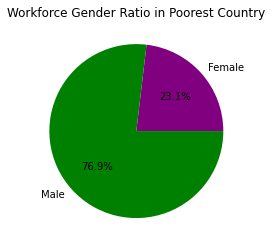

In [51]:
# poorest country

gdp_min = happy_data.loc[happy_data['GDP per capita'] == happy_data['GDP per capita'].min()]

num_female = gdp_min['Workforce Gender Ratio']
num_male = 100

colors=['purple', 'green']
labels=['Female','Male']
title='Workforce Gender Ratio in Poorest Country'
plt.pie([num_female,num_male], colors=colors, labels=labels, autopct='%1.1f%%')
plt.title(title)
plt.show()